<a href="https://colab.research.google.com/github/ashesm/ISY5002_Assignment/blob/main/ASH_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ISY5002


## Ashkan Esmaili Dahesht 

### ISY5002-Assignment
Write a notebook that prompts the user for a company's stock market ticker symbol. Your program then
scrapes the Yahoo Finance website to extract information on the key Executive of the company. Then for each
executive calculate the expected income tax based on the ATO tax tables. The user can choose if the data
will be saved as a CSV and/or stored in an SQLite database. 




# Problem Solving Methodology

In this Assignment Im going to show How I have brocken down the problem and apply the 5 steps of problem solving in modifying and solving the problem. The process of problem solving I will use can be broken down into 5 key steps:
1. State the problem clearly
2. Describe the input and output information
3. Work the problem by hand
4. Develop an algorithm (and convert to python) 
5. Test solution with a variety of data

#State the problem clearly and Input and Output information
The words that Im not familiar with and need more clarification are "promps", "ticker symbol"? and also since in the assignment's specification its not clearly specified to select an Australian company or any company that need to be clarified.

Ticker Symbol: 

* A stock symbol is a unique series of letters assigned to a security for trading purposes.

* Investors and traders use the symbol to place trade orders.

https://www.investopedia.com/terms/s/stocksymbol.asp

To prompt the user I guess i will need to use the input() function

Micheal clarified that its alright to choose any company.

** Note: Since im using ATO table to calculate the income tax im gonna  search for an Australian company **


By understanding the problem I realized that I have scrape the yahoo finance website and find the Key Executive and once I extract them I need to calculate the income tax based on ATO table. So the Input, Output and the process requirements are as followed: 

# Input
* Ticker symbol

* Prompt which is gonna be the input function

# Process
* Scraping yahoo finance website

https://au.finance.yahoo.com/

* Extract the Key Executive


* Calculate the income tax

[Resident tax rates 2021–22
Taxable income](https://www.ato.gov.au/rates/individual-income-tax-rates/)

Income            | Tax on this income 
------------------|----------------------
0 – \$18,200       | Nil
\$18,201 – \$45,000 | 19 cents for each \$1 over \$18,200
\$45,001 – \$120,000 | \$5,092 plus 32.5 cents for each \$1 over \$45,000
\$120,001 – \$180,000 |  \$29,467 plus 37 cents for each \$1 over \$120,000
\$180,001 and over | \$51,667 plus 45 cents for each \$1 over \$180,000

# Output

   * Save to CSV files
   * Save to SQL database


# Search the Website
By exploring the website and searching a ticker symbol the key Executive information apears to be in the "Profile Page".

these are the two companies the I searched with their URL below:

Coles : ticker symbol is "COL.AX"

https://au.finance.yahoo.com/quote/COL.AX/profile?p=COL.AX

National Australian Bank : ticker symbol is "NAB.AX"

https://au.finance.yahoo.com/quote/NAB.AX/profile?p=NAB.AX

Note : "AX" means Australian

Thats the table for the Key Executive:

```
Mr. Ross Maxwell McEwan CBE, B.B.S.    Group CEO, MD & Director    2.54M    N/A    1957
Mr. Gary Andrew Lennon BEC, F.C.A., BEc (Hons), FCA    Group Chief Financial Officer    1.13M    N/A    N/A
Mr. Patrick F. Wright    Group Exec. of Technology & Enterprise Operations    1.72M    N/A    1967
Ms. Sharon J. Cook    Group Exec. of Legal & Commercial Services    912.98k    N/A    N/A
Ms. Susan Ferrier    Group Exec. of People & Culture    929.27k    N/A    N/A
Ms. Angela Mentis B.Bus    Group Chief Digital, Data & Analytics Officer    1.62M    N/A    N/A
Mr. Shaun Dooley    Chief Risk Officer    1.05M    N/A    N/A
Mr. Andrew Irvine    Chief Exec. of Bus. Private Banking Division    333.27k    N/A    N/A
Mr. Lesile D. Matheson    Group Chief Operating Officer    N/A    N/A    1960
Ms. Sally Mihell    Head of Investor Relations    N/A    N/A    N/A
```

This table consists of five columns but as was discussed with Micheal Only 3 column will be needed in income tax calculation. which are :

 * Name
 * title
 * Pay

By looking at the 3rd column I realised that the Pay column consists of 3 types of pays, the pay amount is followed by either "M", " K" or N/A.

So I assume the "M" means a million(1000000) and "K" means a thousand(1000)

An Example of this:

2.54M = 2.54 * 1000000

912.98K = 912.98 * 1000

N/A


# Calculate the incom tax
Here is the function from the previous note book:

```
def calculate_tax(income):
  if income <= 18200:
    tax_payable = 0
  elif 18200 < income <= 45000:
    tax_payable = 0.19 * (income - 18200)
  elif 45000 < income < 120000:
    tax_payable = 5092 + 0.32 * (income - 45000)
  elif 120001 < income < 180000:
    tax_payable = 29467 + 0.37 * (income - 120000)
  elif income > 180000:
    tax_payable = 51667 + 0.45 * (income - 180000)


  return tax_payable
  ```
  Im gonna use this function since im sure its gonna work.

# Initial Algorithm

1. User input ticker symbol
2. Use ticker to get profile page
3. Copied the table
4. For each row of the table
* Process a row to extract pay
* Find the last charecter to detemine multiplier
* Calculate salary, pay * multiplier
* Calculate the income tax

Note:
1. Need to validate the ticker, but for now i will assume the user type in a correct ticker
2. Still need to work out where I save the income tax to

In [4]:
#  User input ticker symbol
ticker_symbol =input("Please input ticker symbol ")
print(ticker_symbol)

Please input ticker symbol nab.ax
nab.ax


In [5]:
# Use ticker to get profile page
 
example_url = 'https://au.finance.yahoo.com/quote/{}/profile?p={}'
example_url.format(ticker_symbol , ticker_symbol)

'https://au.finance.yahoo.com/quote/nab.ax/profile?p=nab.ax'

# How to Use ticker to get profile page
I googled How to insert a variable into a string in python? and used this source :

 https://matthew-brett.github.io/teaching/string_formatting.html

firstly I put curly brackets on the ticker symbols as a space holder in the URL then I used the "format" function and tested with different vriables to undersand how it work.

 example_url = 'https://au.finance.yahoo.com/quote/COL.AX/profile?p=COL.AX'

https://au.finance.yahoo.com/quote/{}/profile?p={}

then I tried the "ticker_symbol".

and once I realised and tested that its working I start to create a function  As follow:

In [6]:
#Create a function to build URL
def build_url():
# User input ticker symbol
  ticker_symbol =input("Please input ticker symbol ")
  # print(ticker_symbol)
  # No need to print the symbol
  example_url = 'https://au.finance.yahoo.com/quote/{}/profile?p={}'
  result = example_url.format(ticker_symbol , ticker_symbol)
  return result

In [7]:
# The above function wont do anything so I did this:
url = build_url()
print(url)

Please input ticker symbol nab.ax
https://au.finance.yahoo.com/quote/nab.ax/profile?p=nab.ax


#Installing and Importing the required Packages

##Kora
This is a collection of tools to make programming on Google Colab easier.

##Beautiful Soup:
 is a Python library that is used for web scraping purposes to pull the data out of HTML and XML files. It creates a parse tree from page source code that can be used to extract data in a hierarchical and more readable manner

https://analyticsindiamag.com/beautiful-soup-webscraping-python/
 
##Selenium
Selenium is a tool to test your web application.

https://www.guru99.com/selenium-python.html#2

## Pandas
pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

https://en.wikipedia.org/wiki/Pandas_(software)

In [8]:
# I installed unique packages
!pip install kora -q

#load packages
from bs4 import BeautifulSoup
from kora.selenium import wd
import pandas as pd

     |████████████████████████████████| 57 kB 4.6 MB/s 
     |████████████████████████████████| 56 kB 3.7 MB/s 


# Getting the Webpage

Once I get the url I need to get the page source.

Whats the page source: By clicking on the web page there will be a link as view page source. 

As follow:



In [ ]:
# get the page
wd.get(url)
soup = BeautifulSoup(wd.page_source, "html.parser")
# the above commend means : I need to get the page Source and tell beautifulsoup I need to use "html parser"
# Parser is a technical term to process the structure.
soup

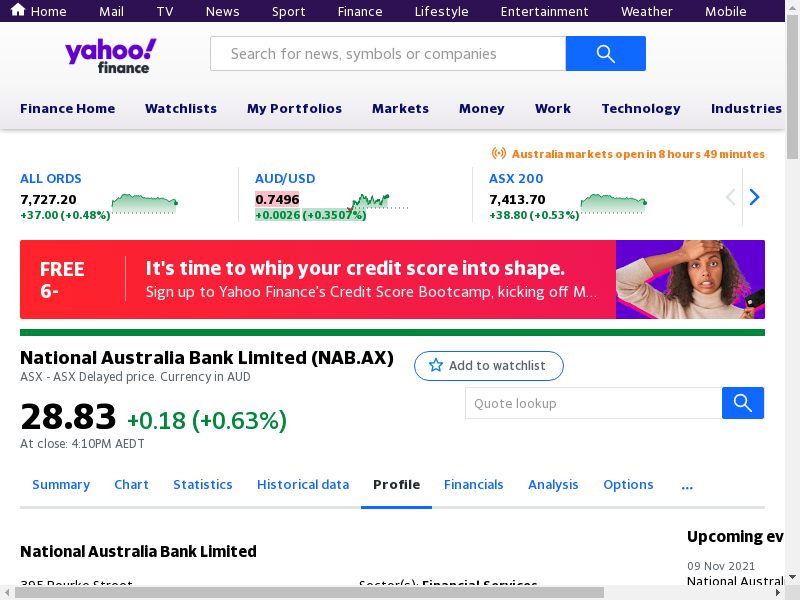

In [10]:
#will show the webpage
wd

# How to copy a table
I came over to the page, right click and inspect

by moving on different things on codes it highlights different things on the page, I could see the table, body, the header or the data body 
there is a tag called "tbody" as the "body" and "tr" as the row
"td" as table data

standard processing of tables is exploring through the table , then the "tbody" tag then "tr" tag and then the "td" as table datas and extract the information as follow:

In [11]:
table = soup.find('table')
body = table.find('tbody')
rows = body.find_all('tr')
# For now process one row and do the hole rows later
row = rows[0]

cells = row.find_all('td')
name = cells[0].text
title = cells[1].text
pay = cells[2].text

# Here is the functions

In [12]:
def get_first_3_cells(row):
  cells = row.find_all('td')
  name = cells[0].text
  title = cells[1].text
  pay = cells[2].text
  # return a dictionary
  return {'name': name, 'title': title, 'pay': pay}

In [13]:
def get_rows(soup):
  # Get the table!
  table = soup.find('table')

  # get to the row
  body = table.find('tbody')
  rows = body.find_all('tr')
  return rows

# Extracting the pay element

when I type a positive number in [ ] it starts from begining of the list and move along but if i put a negative number in it tells python to start from the end of the list and work backwords for example :

 In num_list = [3,2,1] if we run num_list[-1] it gives 1 which  means its  the last element in the list

Considering this we will create the following function:




In [14]:
def get_salary(pay):  
  last_char = pay[-1]
  if last_char == 'M':
    pay_as_num = float(pay[0:-1])
    sal = pay_as_num * 1000000
  elif last_char == 'k':
    pay_as_num = float(pay[0:-1])
    sal = pay_as_num * 1000
  else: # Must be a N/A
    sal = 0
  return sal

# Income tax calculation

In [15]:
def calculate_tax(income):
  ''' This function calculates the income tax based on ATO'''
  if income <= 18200:
    tax_payable = 0
  elif 18200 < income <= 45000:
    tax_payable = 0.19 * (income - 18200)
  elif 45000 < income < 120000:
    tax_payable = 5092 + 0.32 * (income - 45000)
  elif 120001 < income < 180000:
    tax_payable = 29467 + 0.37 * (income - 120000)
  elif income > 180000:
    tax_payable = 51667 + 0.45 * (income - 180000)


  return tax_payable

# Re organizing the functions

In [16]:
# Usually run of Google Coolab, so install unique packages
!pip install kora -q

#load packages
from bs4 import BeautifulSoup
from kora.selenium import wd
import pandas as pd

In [17]:
def build_url():
  ''' This function will build the URL of the profile page'''
  ticker = input("Please type in a ticker symbol ")
  url_pattern = 'https://au.finance.yahoo.com/quote/{}/profile?p={}'
  result = url_pattern.format(ticker, ticker)
  return result

In [18]:
def get_record(row):
  ''' this function will extract the first 3 cells'''
  cells = row.find_all('td')
  name = cells[0].text
  title =  cells[1].text
  pay = cells[2].text
  return {'name': name, 'title': title, 'pay': pay}

In [19]:
def get_rows(soup):
  '''this function explore the webpage and get the table rows'''
  # Get the table!
  table = soup.find('table')

  # get to the row
  body = table.find('tbody')
  rows = body.find_all('tr')
  return rows

In [20]:
def calculate_tax(income):
  ''' this function calculate the income tax based on ATO'''
  if income <= 18200:
    tax_payable = 0
  elif 18200 < income <= 45000:
    tax_payable = 0.19 * (income - 18200)
  elif 45000 < income < 120000:
    tax_payable = 5092 + 0.32 * (income - 45000)
  elif 120001 < income < 180000:
    tax_payable = 29467 + 0.37 * (income - 120000)
  elif income > 180000:
    tax_payable = 51667 + 0.45 * (income - 180000)


  return tax_payable

In [21]:
def get_salary(pay):  
  '''this function extract the pay element and calculate the pay'''
  last_char = pay[-1]
  if last_char == 'M':
    pay_as_num = float(pay[0:-1])
    sal = pay_as_num * 1000000
  elif last_char == 'k':
    pay_as_num = float(pay[0:-1])
    sal = pay_as_num * 1000
  else: # Must be a N/A
    sal = 0
  return sal

In [22]:
url = build_url()
wd.get(url)
soup = BeautifulSoup(wd.page_source,'html.parser')
rows = get_rows(soup)

# getting all the records
records = []
for row in rows:
  rec = get_record(row)
  records.append(rec)

# adding the tax colum
for rec in records:
  sal = get_salary(rec['pay'])
  rec['tax'] = calculate_tax(sal)

# create a pandas dataframe (a data frame is easy to save as csv)
exec_df = pd.DataFrame.from_records(records)
exec_df

Please type in a ticker symbol nab.ax


,name,title,pay,tax
0,"Mr. Ross Maxwell McEwan CBE, B.B.S.","Group CEO, MD & Director",2.54M,1113667.0
1,"Mr. Gary Andrew Lennon BEC, F.C.A., BEc (Hons)...",Group Chief Financial Officer,1.13M,479167.0
2,Mr. Patrick F. Wright,Group Exec. of Technology & Enterprise Operations,1.72M,744667.0
3,Ms. Sharon J. Cook,Group Exec. of Legal & Commercial Services,912.98k,381508.0
4,Ms. Susan Ferrier,Group Exec. of People & Culture,929.27k,388838.5
5,Ms. Angela Mentis B.Bus,"Group Chief Digital, Data & Analytics Officer",1.62M,699667.0
6,Mr. Shaun Dooley,Chief Risk Officer,1.05M,443167.0
7,Mr. Andrew Irvine,Chief Exec. of Bus. Private Banking Division,333.27k,120638.5
8,Mr. Lesile D. Matheson,Group Chief Operating Officer,N/A,0.0
9,Ms. Sally Mihell,Head of Investor Relations,N/A,0.0


# Save as CSV
I searched and found this way to convert the data frame into a CSV file

https://datatofish.com/export-dataframe-to-csv/

Once the content are created we save it the same as following pattern:

r'C:\Users\Ashkan\Desktop\export_dataframe.csv'


  The r character that you should place before the path name (to take care of any symbols within the path name, such as the backslash symbol). Otherwise, you’ll get the following error: (unicode error) ‘unicodeescape’ codec can’t decode bytes in position 2-3: truncated \UXXXXXXXX escape


  The Export data frame represents the file name to be created. You may type a different file name if you’d like


   The CSV part represents the file type, which is ‘csv.’ You must add that portion anytime you want to export your DataFrame to a CSV file. Alternatively, you may use the file type of ‘txt’ if you want to export your DataFrame to a Text file


In [23]:
data = {'name': ['Mr. Ross Maxwell McEwan CBE B.B.S.','Mr. Gary Andrew Lennon BEC, F.C.A., BEc (Hons)','Mr. Patrick F. Wright','Ms. Sharon J. Cook','Ms. Susan Ferrier','Ms. Angela Mentis B.Bus','Mr. Shaun Dooley', 'Mr. Andrew Irvine',	'Mr. Lesile D. Matheson','Ms. Sally Mihell'	,],
        'title': ['Group CEO, MD & Director','Group Chief Financial Officer','Group Exec. of Technology & Enterprise Operations' 	,'Group Exec. of Legal & Commercial Services','Group Exec. of People & Culture','Group Chief Digital, Data & Analytics Officer','Chief Risk Officer','Chief Exec. of Bus. Private Banking Division','Group Chief Operating Officer','Head of Investor Relations'],
        'pay': ['2.54M', '1.13M', '1.72M', '912.98k', '929.27k', '1.62M', '1.05M', '333.27k', 'N/A', 'N/A'],
        'tax': [1113667.0,479167.0,744667.0,381508.0,388838.5,699667.0,443167.0,120638.5, 0.0,0.0 ]
        }

df = pd.DataFrame(data, columns= ['name', 'title','pay', 'tax'])

df.to_csv (r'C:\Users\Ashkan\Desktop\export_dataframe.csv', index = False, header=True)

print (df)

                                             name  ...        tax
0              Mr. Ross Maxwell McEwan CBE B.B.S.  ...  1113667.0
1  Mr. Gary Andrew Lennon BEC, F.C.A., BEc (Hons)  ...   479167.0
2                           Mr. Patrick F. Wright  ...   744667.0
3                              Ms. Sharon J. Cook  ...   381508.0
4                               Ms. Susan Ferrier  ...   388838.5
5                         Ms. Angela Mentis B.Bus  ...   699667.0
6                                Mr. Shaun Dooley  ...   443167.0
7                               Mr. Andrew Irvine  ...   120638.5
8                          Mr. Lesile D. Matheson  ...        0.0
9                                Ms. Sally Mihell  ...        0.0

[10 rows x 4 columns]


#DataFrame to SQL

https://datatofish.com/pandas-dataframe-to-sql/

Step 1: Create a DataFrame

Step 2: Create a Database:

To start, I’ll need to import the sqlite3 package:

then create the database and named it 'Assignment'

finally Create the data table 

The ‘data’ table will be used to store the information from the DataFrame

Step 3: Get from Pandas DataFrame to SQL

I just re orgonized the steps in the final version  as follow:

In [33]:
#Import the package
import sqlite3

# Create the database
conn = sqlite3.connect('Assignment')
c = conn.cursor()

# Create data table
c.execute('CREATE TABLE IF NOT EXISTS data (name text, title text, pay number, tax number)')
conn.commit()

# Create a data frame
data = {'name': ['Mr. Ross Maxwell McEwan CBE B.B.S.','Mr. Gary Andrew Lennon BEC, F.C.A., BEc (Hons)','Mr. Patrick F. Wright','Ms. Sharon J. Cook','Ms. Susan Ferrier','Ms. Angela Mentis B.Bus','Mr. Shaun Dooley', 'Mr. Andrew Irvine',	'Mr. Lesile D. Matheson','Ms. Sally Mihell'	,],
        'title': ['Group CEO, MD & Director','Group Chief Financial Officer','Group Exec. of Technology & Enterprise Operations' 	,'Group Exec. of Legal & Commercial Services','Group Exec. of People & Culture','Group Chief Digital, Data & Analytics Officer','Chief Risk Officer','Chief Exec. of Bus. Private Banking Division','Group Chief Operating Officer','Head of Investor Relations'],
        'pay': ['2.54M', '1.13M', '1.72M', '912.98k', '929.27k', '1.62M', '1.05M', '333.27k', 'N/A', 'N/A'],
        'tax': [1113667.0,479167.0,744667.0,381508.0,388838.5,699667.0,443167.0,120638.5, 0.0,0.0 ]
        }

#Get from Pandas DataFrame to SQL
df = pd.DataFrame(data, columns= ['name', 'title','pay', 'tax'])
df.to_sql('data', conn, if_exists='replace', index = False)

c.execute('''  
		SELECT * FROM data	
          ''')

df = pd.DataFrame(c.fetchall(), columns=['name','title', 'pay', 'tax'])    
print (df)  

                                             name  ...        tax
0              Mr. Ross Maxwell McEwan CBE B.B.S.  ...  1113667.0
1  Mr. Gary Andrew Lennon BEC, F.C.A., BEc (Hons)  ...   479167.0
2                           Mr. Patrick F. Wright  ...   744667.0
3                              Ms. Sharon J. Cook  ...   381508.0
4                               Ms. Susan Ferrier  ...   388838.5
5                         Ms. Angela Mentis B.Bus  ...   699667.0
6                                Mr. Shaun Dooley  ...   443167.0
7                               Mr. Andrew Irvine  ...   120638.5
8                          Mr. Lesile D. Matheson  ...        0.0
9                                Ms. Sally Mihell  ...        0.0

[10 rows x 4 columns]


I knew t